<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/5_APIs_and_Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **APIs & Data Collection**
Application Programming Interface (API): It allows two pieces of software to interact with each other. APIs are used to communicate with other software via input and output.

Pandas is actually a set of software components, that are not even written in Python. We use the Pandas API to process the data by communicating with other software components.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Instance => when you create a dictionary then create a pandas object with the DataFrame constructor, in API lingo, this is an “instance” - the data in the dictionary is passed along to the pandas API and the dataframe is used to communicate with the API.
dict = {'a': [11,21,31],
        'b': [12,22,32]}
dict

{'a': [11, 21, 31], 'b': [12, 22, 32]}

In [ ]:
df = pd.DataFrame(dict)
print(df)
print(type(df))

    a   b
0  11  12
1  21  22
2  31  32
<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [ ]:
df.mean()

,0
a,21.0
b,22.0


#####REST APIs

REpresentational State Transfer (REST) API: REST API allows you to communicate through the internet letting you take advantage of resources like storage, access to more data, AI algorithms and more. In REST APIs, the program is called the client. The API communicates with a web service called through the internet. There are a set of rules regarding communication, input or request, and output or response.

We tell the REST APIs what to do by sending a request/ input. The request is usually communicated via an HTTP message that usually contains a JSON (like dictionary) file. This contains instructions for what operation we would like the service to perform. The operation is transmitted to the web service via the internet and the service performs the operation. In a similar manner, the web service returns a response/ output via an HTTP message, where the information is usually returned via a JSON file. This information is transmitted back to the client.


In [ ]:
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.1/281.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [ ]:
def one_dict(list_dict):
  keys = list_dict[0].keys()
  out_dict={key:[] for key in keys}
  for dict_ in list_dict:
    for key, value in dict_.items():
      out_dict[key].append(value)
  return  out_dict

In [ ]:
# The method get_teams() returns a list of dictionaries
nba_teams = teams.get_teams()
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [ ]:
# To make things easier, we can convert the dictionary to a table => We use the one_dict function to create a dictionary. We use the common keys for each team as keys, the value is a list. Each element of the list corresponds to the value for each team. We then convert the dictionary to a dataframe, each row containing the information for a different team.
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [ ]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [ ]:
# Accessing first column of the DataFrame
id_warriors=df_warriors[['id']].values[0][0]
id_warriors

1610612744

In [ ]:
# The function "League Game Finder" will make an API call
# The function is imported from the module 'stats.endpoints'
from nba_api.stats.endpoints import leaguegamefinder

In [ ]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")


In [ ]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [ ]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

In [ ]:
print(games_home['PLUS_MINUS'].mean())
print(games_away['PLUS_MINUS'].mean())
print(games_home['PTS'].mean())
print(games_away['PTS'].mean())

3.730769230769231
-0.6071428571428571
106.8076923076923
102.96428571428571


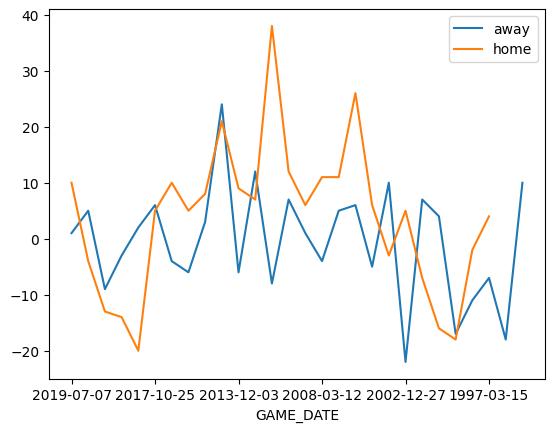

In [ ]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

#### **Project Scenario**
An international firm that is looking to expand its business in different countries across the world has recruited you. You have been hired as a junior Data Engineer and are tasked with creating a script that can extract the list of the top 10 largest economies of the world in descending order of their GDPs in Billion USD (rounded to 2 decimal places), as logged by the International Monetary Fund (IMF).

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [ ]:
URL="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"
# extract tables from webpage using pandas
tables = pd.read_html(URL)
df = tables[3]

# to replace the column headers with column numbers
df.columns = range(df.shape[1])

# to retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0,2]]

# to retain the rows with index 1-10, indicating the top 10 economies of the world
df = df.iloc[1:11,:]

# to assign column names as 'Country' and 'GDP (Million USD)'
df.columns = ['Country', 'GDP (Million USD)']

In [ ]:
# to change the data type of 'GDP (Million USD)' column to integer
df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)

# Convert the GDP value in Million USD to Billion USD
df[['GDP (Million USD)']] = df[['GDP (Million USD)']]/1000

# Use numpy.round() method to round the value to 2 decimal places.
df[['GDP (Million USD)']] = np.round(df[['GDP (Million USD)']], 2)

# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
df.rename(columns = {'GDP (Million USD)' : 'GDP (Billion USD)'})

,Country,GDP (Billion USD)
1,United States,26854.60
2,China,19373.59
3,Japan,4409.74
4,Germany,4308.85
5,India,3736.88
6,United Kingdom,3158.94
7,France,2923.49
8,Italy,2169.74
9,Canada,2089.67
10,Brazil,2081.24


In [ ]:
# to load dataframe to csv file
df.to_csv('./Largest_economies.csv')

In [ ]:
# GET Request - the Get Method functions can be used to generate the required parameters to construct a dataset
!pip install randomuser
from randomuser import RandomUser
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for randomuser: filename=randomuser-1.6-py3-none-any.whl size=5067 sha256=3bba341f9ac8fd90586020ac680e27470bf99b6920bac20180f74e7acc4f33a0
  Stored in directory: /root/.cache/pip/wheels/b8/f3/19/6a938647065b4bb2471a9d063647d14d4fcc3236731f4e2b53
Successfully built randomuser


In [ ]:
r = RandomUser()

In [ ]:
some_list = r.generate_users(10)
some_list

In [ ]:
name = r.get_full_name # to get full name

In [ ]:
for user in some_list:
    print (user.get_full_name()," ",user.get_email())

Daniela Ibañez   daniela.ibanez@example.com
Andrea Scott   andrea.scott@example.com
Kim Lawson   kim.lawson@example.com
Sophie Fortin   sophie.fortin@example.com
Eduardo Frazier   eduardo.frazier@example.com
Aino Perko   aino.perko@example.com
Jonathan Hansen   jonathan.hansen@example.com
Raul Vazquez   raul.vazquez@example.com
Enrique Castillo   enrique.castillo@example.com
Paige Moore   paige.moore@example.com


In [ ]:
for user in some_list:
    print (user.get_full_name()," ",user.get_picture())

Daniela Ibañez   https://randomuser.me/api/portraits/women/90.jpg
Andrea Scott   https://randomuser.me/api/portraits/women/67.jpg
Kim Lawson   https://randomuser.me/api/portraits/women/63.jpg
Sophie Fortin   https://randomuser.me/api/portraits/women/87.jpg
Eduardo Frazier   https://randomuser.me/api/portraits/men/13.jpg
Aino Perko   https://randomuser.me/api/portraits/women/20.jpg
Jonathan Hansen   https://randomuser.me/api/portraits/men/3.jpg
Raul Vazquez   https://randomuser.me/api/portraits/men/28.jpg
Enrique Castillo   https://randomuser.me/api/portraits/men/66.jpg
Paige Moore   https://randomuser.me/api/portraits/women/20.jpg


In [ ]:
def get_users():
  users = []

  for user in RandomUser.generate_users(10):
    users.append({"Name": user.get_full_name(),
                 "Gender": user.get_gender(),
                 "City": user.get_city(),
                 "State": user.get_state(),
                 "Email": user.get_email(),
                 "Date of Birth": user.get_dob()})

  return pd.DataFrame(users)

In [ ]:
get_users()

,Name,Gender,City,State,Email,Date of Birth
0,Paulina Francois,female,Lohn (Gr),Zürich,paulina.francois@example.com,1992-08-13T07:27:24.108Z
1,Jimmy Lambert,male,Donabate,Louth,jimmy.lambert@example.com,1963-01-17T13:40:50.988Z
2,Tristan Rasmussen,male,Stenderup,Hovedstaden,tristan.rasmussen@example.com,1964-09-20T19:57:28.670Z
3,Alan Howard,male,Thurles,Carlow,alan.howard@example.com,1964-03-16T18:05:45.388Z
4,Tristan Pedersen,male,Noerre Alslev,Hovedstaden,tristan.pedersen@example.com,1980-07-01T03:57:05.224Z
5,Isa Røyset,female,Rød,Møre og Romsdal,isa.royset@example.com,1964-04-14T00:39:52.462Z
6,Claudia Cruz,female,Málaga,Andalucía,claudia.cruz@example.com,1963-04-27T13:33:52.957Z
7,Vicenta Pastor,female,Arrecife,Aragón,vicenta.pastor@example.com,1977-11-23T10:02:10.774Z
8,Noelia Vega,female,Bilbao,Extremadura,noelia.vega@example.com,1963-07-20T23:50:59.402Z
9,Raphaël Moulin,male,Roubaix,Tarn,raphael.moulin@example.com,1997-12-10T17:31:53.529Z


In [ ]:
df1 = pd.DataFrame(get_users())

In [ ]:
# Another way to use APIs is through the "Request" library.
import requests
import json

In [ ]:
data = requests.get("https://fruityvice.com/api/fruit/all")
results = json.loads(data.text)

In [ ]:
pd.DataFrame(results)

,name,id,family,order,genus,nutritions
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,"{'calories': 81, 'fat': 0.0, 'sugar': 18.0, 'c..."
1,Strawberry,3,Rosaceae,Rosales,Fragaria,"{'calories': 29, 'fat': 0.4, 'sugar': 5.4, 'ca..."
2,Banana,1,Musaceae,Zingiberales,Musa,"{'calories': 96, 'fat': 0.2, 'sugar': 17.2, 'c..."
3,Tomato,5,Solanaceae,Solanales,Solanum,"{'calories': 74, 'fat': 0.2, 'sugar': 2.6, 'ca..."
4,Pear,4,Rosaceae,Rosales,Pyrus,"{'calories': 57, 'fat': 0.1, 'sugar': 10.0, 'c..."
5,Durian,60,Malvaceae,Malvales,Durio,"{'calories': 147, 'fat': 5.3, 'sugar': 6.75, '..."
6,Blackberry,64,Rosaceae,Rosales,Rubus,"{'calories': 40, 'fat': 0.4, 'sugar': 4.5, 'ca..."
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,"{'calories': 50, 'fat': 0.34, 'sugar': 5.74, '..."
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,"{'calories': 61, 'fat': 0.5, 'sugar': 9.0, 'ca..."
9,Lychee,67,Sapindaceae,Sapindales,Litchi,"{'calories': 66, 'fat': 0.44, 'sugar': 15.0, '..."


In [ ]:
df3 = pd.json_normalize(results)
df3

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.00,18.00,18.00,0.00
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.50,0.80
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.00,1.00
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.20,2.60,3.90,0.90
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.10,10.00,15.00,0.40
5,Durian,60,Malvaceae,Malvales,Durio,147,5.30,6.75,27.10,1.50
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.00,1.30
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,50,0.34,5.74,11.30,0.75
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,61,0.50,9.00,15.00,1.10
9,Lychee,67,Sapindaceae,Sapindales,Litchi,66,0.44,15.00,17.00,0.80


In [ ]:
cherry = df3.loc[df3['name']=='Cherry']
(cherry.iloc[0]['family']), (cherry.iloc[0]['genus'])

('Rosaceae', 'Prunus')

In [ ]:
cal_banana = df3.loc[df3["name"]== 'Banana']
cal_banana.iloc[0]['nutritions.calories']

96

In [ ]:
import requests
import json
jokes = "https://official-joke-api.appspot.com/jokes/ten"
data1 = requests.get(jokes)

In [ ]:
results2 = json.loads(data1.text)

In [ ]:
import pandas as pd
df4 = pd.DataFrame(results2)
df4.drop(columns=['type','id'], inplace=True)
df4


,setup,punchline
0,Why are ghosts bad liars?,Because you can see right through them!
1,Why does Waldo only wear stripes?,Because he doesn't want to be spotted.
2,What did the dog say to the two trees?,Bark bark.
3,I bought some shoes from a drug dealer.,"I don't know what he laced them with, but I wa..."
4,Why do mathematicians hate the U.S.?,Because it's indivisible.
5,Why didn't the skeleton go for prom?,Because it had nobody.
6,Why do trees seem suspicious on sunny days?,"Dunno, they're just a bit shady."
7,How come the stadium got hot after the game?,Because all of the fans left.
8,How do you comfort a designer?,You give them some space... between the elements.
9,What kind of tree fits in your hand?,A palm tree!
